In [1]:
library( tidyverse )
library( Amelia )

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.3.4     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [2]:
df <- read.csv( '../data/7_segmentation/country-data.csv' )

In [3]:
cat <- read.csv( '../data/7_segmentation/variables-catalog.csv' )

## Step 1: Business understanding
The key business question to be answered in this project is: 'What cluster of countries in the dataset are most similar to the United States'.
The data needed to answer this question would contain a list of countries with as many demographic factors as could be gathered, as close to the present time as possible. This would allow us to compare other countries to the characteristics of the United States, and select the group of countries most similar.

## Step 2: Clean the data

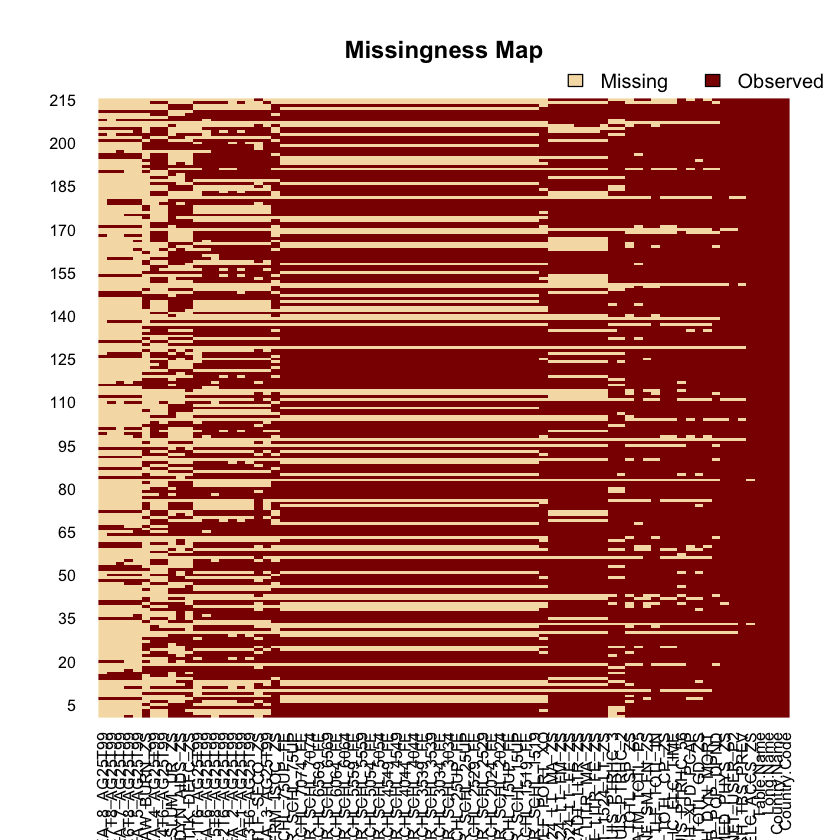

In [4]:
missmap( df )

Check for countries with more than 25 missing data points.

In [5]:
df$missingness_cnt <- apply(df, 1, function(x) sum(is.na(x)))

In [6]:
df <- df[df$missingness_cnt < 25,]

In [7]:
nrow( df )

[1] 144

Remove any variables not relevant to the analysis. These variable categories include Background and Health.

In [8]:
cat <- cat %>%
    select( 1:3 )

In [9]:
ncol( df )

[1] 81

In [10]:
nrow( cat )

[1] 76

In [11]:
df <- subset( df, select=-c( IT_NET_USER_P2
              , SH_DYN_AIDS_ZS
              , SH_DYN_MORT
              , SH_MED_PHYS_ZS
              , SH_XPD_PCAP
              , SN_ITK_DEFC_ZS
              , SP_POP_DPND
              , SG_VAW_BURN_ZS
              , SH_TBS_PREV
              , missingness_cnt ) )


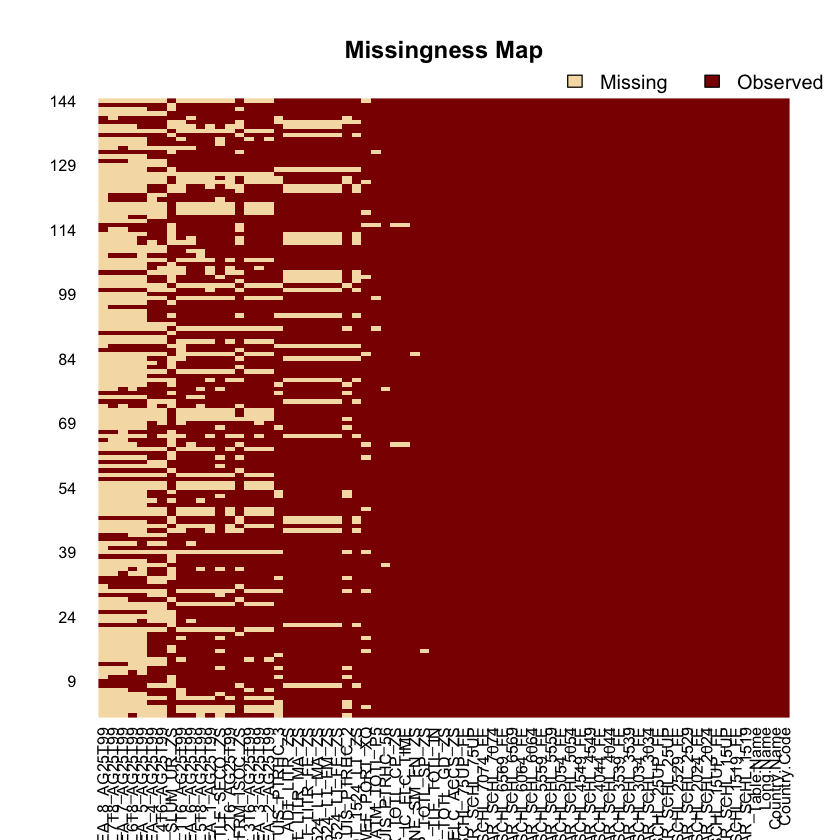

In [12]:
missmap( df )

Done.

## Step 3: Determine clusters and methodology

Given the many variables for average years of total schooling, I think PCA would be an appropriate way of accomplishing variable reduction.

In [13]:
library( FactoMineR )

In [14]:
pca1 <- PCA( scale( df[,5:34] ), scale.unit=TRUE, graph = TRUE )

In [15]:
head( pca1$eig )

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,27.12883664,90.4294555,90.42946
comp 2,1.78013347,5.9337782,96.36323
comp 3,0.37770250,1.2590083,97.62224
comp 4,0.25066620,0.8355540,98.45780
comp 5,0.10412433,0.3470811,98.80488
comp 6,0.08685412,0.2895137,99.09439


It looks like the first three components will capture 99% of the variance.

In [16]:
df <- cbind( df, pca1$ind$coord[,1:2] )

In [18]:
df <- df[,-c( 5:34 )]

In [20]:
names( df ) <- c("Country.Code", "Country.Name", "Long.Name", "Table.Name", 
"EG_ELC_ACCS_ZS", "EN_POP_SLUM_UR_ZS", "FB_ATM_TOTL_P5", "IC_ELC_TIME", 
"IC_FRM_ISOC_ZS", "IC_TAX_TOTL_CP_ZS", "IQ_WEF_PORT_XQ", "SE_ADT_1524_LT_FE_ZS", 
"SE_ADT_1524_LT_FM_ZS", "SE_ADT_1524_LT_MA_ZS", "SE_ADT_1524_LT_ZS", 
"SE_ADT_LITR_FE_ZS", "SE_ADT_LITR_MA_ZS", "SE_ADT_LITR_ZS", "SE_XPD_TOTL_GD_ZS", 
"SL_EMP_TOTL_SP_ZS", "SL_TLF_SECO_ZS", "SL_TLF_TOTL_IN", "TM_TAX_MANF_SM_FN_ZS", 
"UIS_EA_1_AG25T99", "UIS_EA_1T6_AG25T99", "UIS_EA_2_AG25T99", 
"UIS_EA_2T6_AG25T99", "UIS_EA_3_AG25T99", "UIS_EA_3T6_AG25T99", 
"UIS_EA_4_AG25T99", "UIS_EA_4T6_AG25T99", "UIS_EA_5_AG25T99", 
"UIS_EA_5T8_AG25T99", "UIS_EA_6_AG25T99", "UIS_EA_6T8_AG25T99", 
"UIS_EA_7_AG25T99", "UIS_EA_7T8_AG25T99", "UIS_EA_8_AG25T99", 
"UIS_PTRHC_2", "UIS_PTRHC_3", "UIS_PTRHC_56", "SCHOOL_PC1", "SCHOOL_PC2"
)

In [21]:
head( df )

,Country.Code,Country.Name,Long.Name,Table.Name,EG_ELC_ACCS_ZS,EN_POP_SLUM_UR_ZS,FB_ATM_TOTL_P5,IC_ELC_TIME,IC_FRM_ISOC_ZS,IC_TAX_TOTL_CP_ZS,⋯,UIS_EA_6_AG25T99,UIS_EA_6T8_AG25T99,UIS_EA_7_AG25T99,UIS_EA_7T8_AG25T99,UIS_EA_8_AG25T99,UIS_PTRHC_2,UIS_PTRHC_3,UIS_PTRHC_56,SCHOOL_PC1,SCHOOL_PC2
3,AFG,Afghanistan,Islamic State of Afghanistan,Afghanistan,43.00000,62.7,0.8020815,114,22.1,36.3,⋯,NA,NA,NA,NA,NA,45.04142,30.74908,31.89532,-8.996957,-1.2722960
5,ALB,Albania,Republic of Albania,Albania,100.00000,NA,35.0252637,177,18.8,36.5,⋯,0.56894,12.89966,12.24111,12.33073,0.08962,12.33030,17.65478,23.59427,2.801827,0.4582805
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,97.69783,NA,60.8972768,32,NA,15.9,⋯,17.95257,NA,NA,NA,NA,14.14972,9.67677,17.46125,1.219101,1.0436225
7,ARG,Argentina,Argentine Republic,Argentina,99.80000,16.7,59.4499544,92,18.2,137.4,⋯,13.65574,NA,NA,NA,NA,14.09969,8.02675,16.77677,2.780535,-0.7727919
8,ARM,Armenia,Republic of Armenia,Armenia,100.00000,14.4,58.2658291,180,23.6,19.9,⋯,NA,24.42338,24.12319,NA,0.30020,NA,NA,7.10141,4.806788,-1.2330417
11,AUS,Australia,Commonwealth of Australia,Australia,100.00000,NA,160.7520453,75,NA,47.6,⋯,20.98663,26.74360,4.77119,5.75698,0.98578,NA,NA,27.47249,6.092248,-0.6667299


Completed PCA

### Create clusters using several different methods

In [23]:
kmeans( df[,5:ncol(df)], centers = 4)

ERROR: Error in do_one(nmeth): NA/NaN/Inf in foreign function call (arg 1)
